In [1]:
%matplotlib inline
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy
plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
y, sr = librosa.load("../Songs/river_flows_in_you.wav")

In [3]:
def get_secs(song, secs, samrate=22050):
    return(song[:(secs*samrate)])

In [4]:
small = get_secs(y, 20)

In [5]:
onset_frames = librosa.onset.onset_detect(small, sr)

In [6]:
onset_times = librosa.frames_to_time(onset_frames)

In [9]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(small))

In [10]:
ipd.Audio(small + clicks, rate=sr)

In [26]:
ipd.Audio(small, rate=sr)

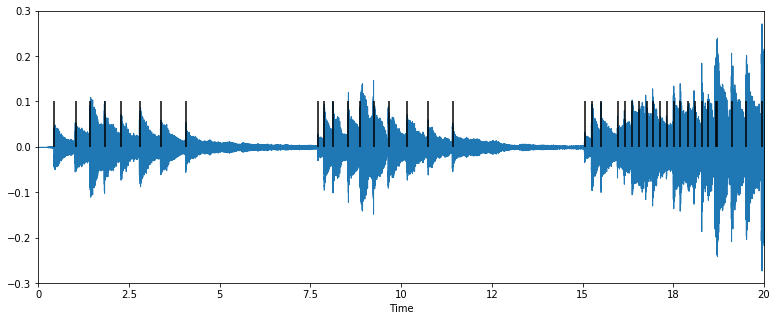

In [9]:
plt.vlines(onset_times, 0, .1, color='k')
librosa.display.waveplot(small)

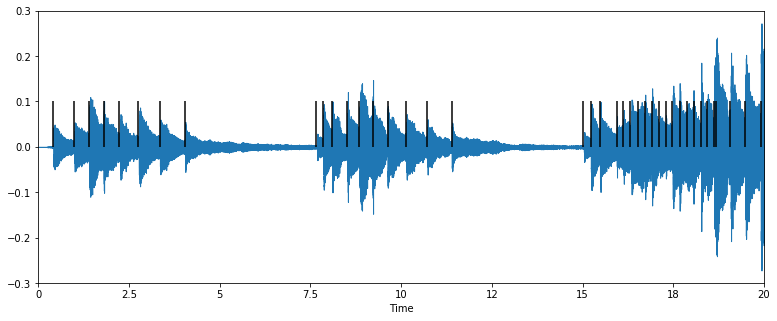

In [10]:
hop_length = 128
onset_frames = librosa.onset.onset_detect(small, sr=sr, hop_length=hop_length, backtrack=True)
onset_times = (librosa.frames_to_time(onset_frames))/4
plt.vlines(onset_times, 0, .1, color='k')
librosa.display.waveplot(small)
clicks = librosa.clicks(frames=(onset_frames/4), sr=sr, length=len(small))
ipd.Audio(small + clicks, rate=sr)

In [137]:
onset_times/2

array([0.2031746 , 0.49052154, 0.69079365, 0.89977324, 1.11165533,
       1.37578231, 1.67473923, 2.01723356, 3.83129252, 3.92417234,
       4.05188209, 4.25795918, 4.42340136, 4.609161  , 4.8123356 ,
       5.0706576 , 5.35800454, 5.69759637, 7.50585034, 7.61324263,
       7.74095238, 7.97024943, 8.05732426, 8.15600907, 8.26920635,
       8.36498866, 8.45496599, 8.55655329, 8.64943311, 8.73941043,
       8.83809524, 8.94258503, 9.02965986, 9.13705215, 9.218322  ,
       9.31120181, 9.34022676, 9.53759637, 9.74367347, 9.95845805])

In [12]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [14]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

In [15]:
concatenated_signal = concatenate_segments(small, onset_samples, 0.500)

In [16]:
onset_samples

array([  8960,  21632,  30464,  39680,  49024,  60672,  73856,  88960,
       168960, 173056, 178688, 187776, 195072, 203264, 212224, 223616,
       236288, 251264, 331008, 335744, 341376, 351488, 355328, 359680,
       364672, 368896, 372864, 377344, 381440, 385408, 389760, 394368,
       398208, 402944, 406528, 410624, 411904, 420608, 429696, 439168])

In [17]:
ipd.Audio(concatenated_signal, rate=sr)

In [98]:
len(concatenated_signal)

487080

In [21]:
def retconcatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
#     return numpy.concatenate([
#         numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
#         for i in onset_samples
#     ])
    for i in onset_samples:
        yield numpy.array(x[i:i+frame_sz])

In [22]:
a = []
for x in retconcatenate_segments(small, onset_samples, 0.500):
    a.append(x)

In [23]:
len(a)

40

In [24]:
len(onset_samples)

40

In [26]:
ipd.Audio(a[0], rate=sr)

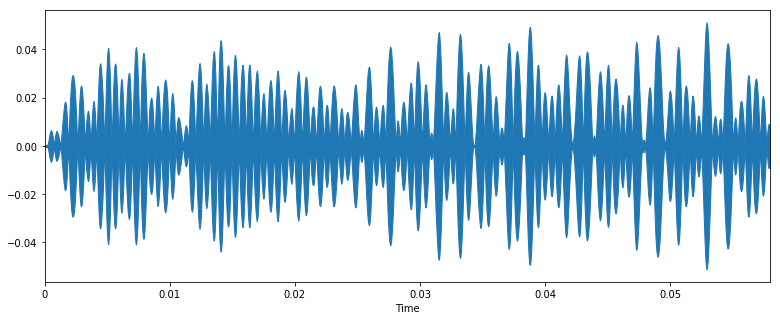

In [27]:
librosa.display.waveplot(a[0], sr)

In [28]:
import scipy
import scipy.fftpack as syfp

In [40]:
X = scipy.fft(a[0])
X_mag = numpy.absolute(X)
f = numpy.linspace(0, sr, len(X_mag))

Text(0.5, 0, 'Frequency (Hz)')

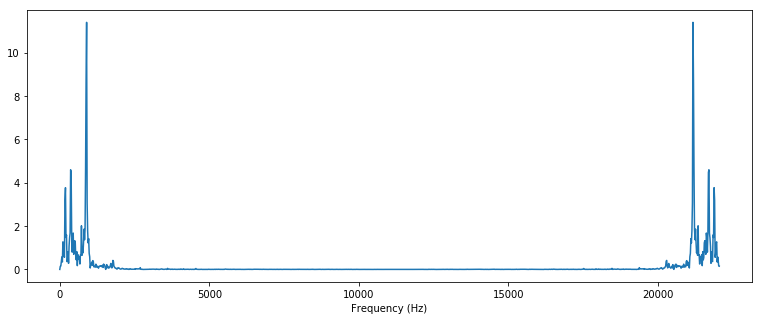

In [42]:
plt.plot(f[:5000], X_mag[:5000])
plt.xlabel('Frequency (Hz)')

In [279]:
notes =librosa.util.peak_pick(abs(x), 3, 3, 3, 5, 0.5, 10)

In [280]:
freqs = syfp.fftfreq(len(u))


NameError: name 'u' is not defined

In [281]:
librosa.hz_to_note(notes)

['D-1', 'F0', 'D#1', 'A#1', 'D2', 'F2', 'G#2']

In [101]:
X = scipy.fftpack.rfft(a[0])

In [102]:
X_mag = numpy.absolute(X)

In [103]:
f = numpy.linspace(0, sr, len(X_mag))

Text(0.5, 0, 'Frequency (Hz)')

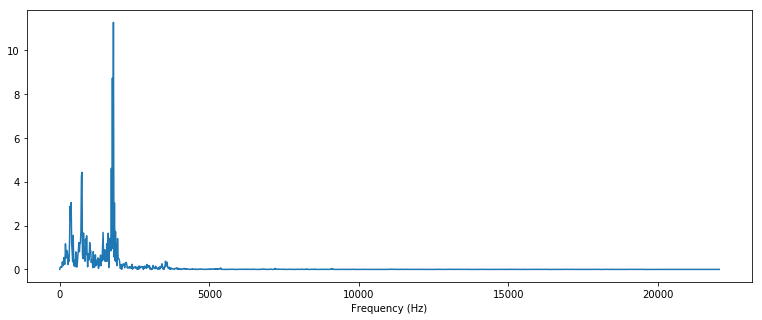

In [104]:
plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

In [105]:
note = (X.argmax()/len(X))*sr

In [107]:
nn = (note/1200)*20000
print(note)

1791.5625


In [108]:
librosa.hz_to_note(note)

'A6'

In [140]:
peaks = librosa.util.peak_pick(X ,10, 10, 10, 10, 1.2, 10)

In [141]:
librosa.hz_to_note((peaks/len(X))*sr)

['F4', 'F#5', 'B5', 'A6']

In [77]:
S = numpy.abs(librosa.stft(small))

In [99]:
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

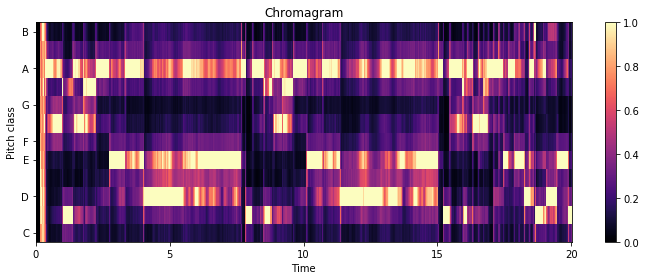

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [84]:
len(chroma[0])

862